In [1]:
import pymc
import numpy as np
import sklearn.datasets
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data

In [2]:
boston_prices = sklearn.datasets.load_boston()

In [35]:
X = boston_prices['data']
features = boston_prices['feature_names']
y_price = boston_prices['target']

In [4]:
boston_prices.viewkeys()

dict_keys(['data', 'feature_names', 'DESCR', 'target'])

In [5]:
print X.shape
print y.shape

(506, 13)
(506,)


In [6]:
boston_prices['DESCR']

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

In [7]:
# NOX      nitric oxides concentration (parts per 10 million)

X_nox = X[:, 4] 

## 2. Model Setup: y = a0 + a1 * x

In [8]:
a0 = pymc.Normal('a0', 0, 0.001)
a1 = pymc.Normal('a1', 0, 0.001)

In [9]:
x_nox = pymc.Normal('nox', 0, 1, value = X_nox, observed = True)

In [10]:
@pymc.deterministic
def linear_model(a0 = a0, a1 = a1, x=x_nox):
    return a0 + a1 * x

In [36]:
y = pymc.Normal('price', linear_model, 1, value = y_price, observed = True)

In [37]:
model = pymc.Model([linear_model, a0, a1, y, x_nox])

## 3. Learning: MCMC

In [15]:
mcmc = pymc.MCMC(model)

In [26]:
mcmc.sample(50000, 5000)

 [-----------------100%-----------------] 50000 of 50000 complete in 7.1 sec

Mean:  -33.8991311596
Variance:  0.133464030322


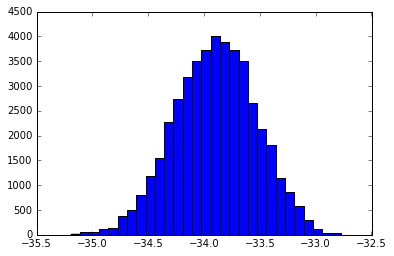

In [30]:
# Posterior of 'a1'

plt.hist(mcmc.trace('a1')[:], bins=30)
print 'Mean: ', np.mean(mcmc.trace('a1')[:])
print 'Variance: ', np.var(mcmc.trace('a1')[:])

Mean:  41.3368306568
Variance:  0.0429386449119


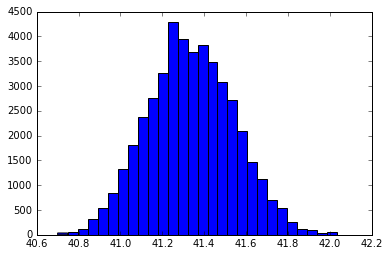

In [31]:
# Posterior of 'a0'

plt.hist(mcmc.trace('a0')[:], bins=30)
print 'Mean: ', np.mean(mcmc.trace('a0')[:])
print 'Variance: ', np.var(mcmc.trace('a0')[:])

(array([  4.,   7.,  10.,  13.,  12.,  30.,  28.,  22.,  32.,  52.,  51.,
         51.,  50.,  23.,  11.,  16.,  14.,  11.,  15.,   6.,   9.,   6.,
          1.,   1.,   3.,   4.,   3.,   2.,   1.,  18.]),
 array([  5. ,   6.5,   8. ,   9.5,  11. ,  12.5,  14. ,  15.5,  17. ,
         18.5,  20. ,  21.5,  23. ,  24.5,  26. ,  27.5,  29. ,  30.5,
         32. ,  33.5,  35. ,  36.5,  38. ,  39.5,  41. ,  42.5,  44. ,
         45.5,  47. ,  48.5,  50. ]),
 <a list of 30 Patch objects>)

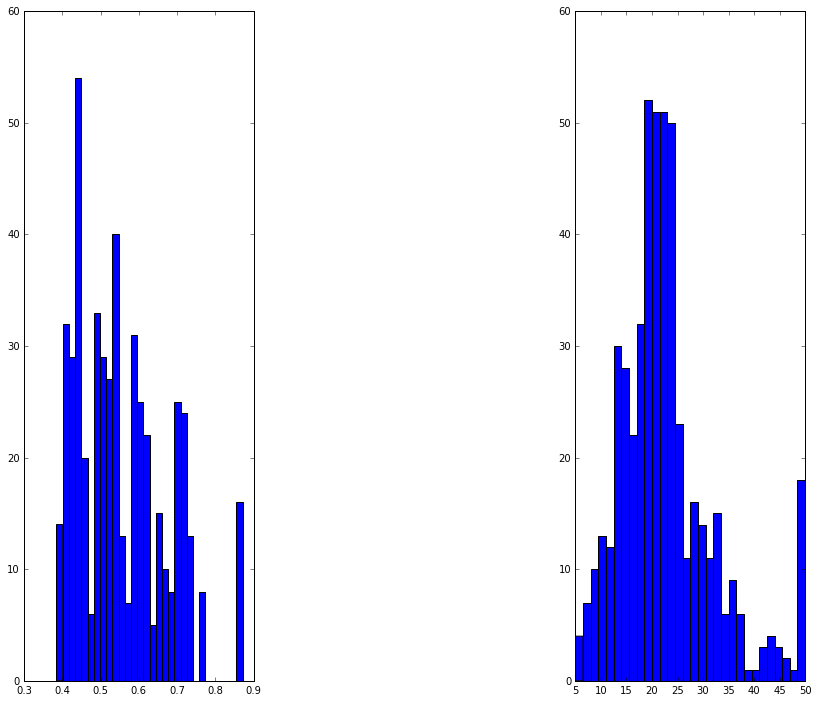

In [45]:
# Distribution of 'x' and 'y'

plt.figure(figsize=(14, 12))
plt.subplot(1, 3, 1)
plt.hist(X_nox, bins = 30)

plt.subplot(1, 3, 3)
plt.hist(y_price, bins=30)